In [1]:
import Global_Functions as gf
import Data_Processing as dp
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

SAVE_FOLDER = "../Images/Comparison/"
gf.check_folder(SAVE_FOLDER)

Folder already exists.


In [2]:
# # experiment 2
# results_rnn = gf.open_CSV_file('../Images/Validation/Synthetic/RNN/2021-05-26_10-43/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/add_scaled/2021-05-24_13-05/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/predict_scaled/2021-05-24_13-11/99_results.csv')
# title = 'LSTM(Neur)'

In [3]:
# # experiment 3
# results_rnn = gf.open_CSV_file('../Images/Validation/Synthetic/RNN/2021-05-26_09-17/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/add_scaled/2021-05-25_16-43/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/predict_scaled/2021-05-25_16-43/99_results.csv')
# title = 'LSTM(Neur), LSTM(Neur/2)'

In [4]:
# # experiment 5
# results_rnn = gf.open_CSV_file('../Images/Validation/Synthetic/RNN/2021-05-26_10-03/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/add_scaled/2021-05-25_14-04/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/predict_scaled/2021-05-25_14-04/99_results.csv')
# title = 'LSTM(Neur), Dense(Neur/2)'

In [5]:
# # experiment 6
# results_rnn = gf.open_CSV_file('../Images/Validation/Synthetic/RNN/2021-05-26_09-17/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/add_scaled/2021-05-25_09-38/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Validation/Synthetic/Difference/predict_scaled/2021-05-25_09-39/99_results.csv')
# title = 'LSTM(Neur), LSTM(Neur/2), Dense(Neur/2)'

In [6]:
def convert_results_to_np_array(results):
    data = [x[1:-1] for x in results['rmse']]
    return np.array(data, dtype = 'float')

In [7]:
rnn = convert_results_to_np_array(results_rnn)
add = convert_results_to_np_array(results_input)
out = convert_results_to_np_array(results_output)

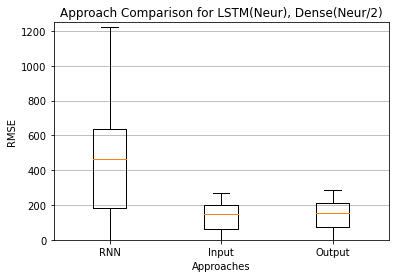

In [8]:
data = [rnn, add, out]
fig, ax = plt.subplots()
ax.set_title('Approach Comparison for ' + title)
ax.set_xlabel('Approaches')
ax.set_ylabel('RMSE')
ax.yaxis.grid(True)
plt.ylim([0, 1250])
plt.boxplot(data, labels = ['RNN', 'Input', 'Output'], )
plt.show()

fig.savefig(SAVE_FOLDER + 'experiment_5.png')